In [1]:
# Name: Sundar Swaminathan, Course: CIS-583, UMICH_ID: 29200876

784


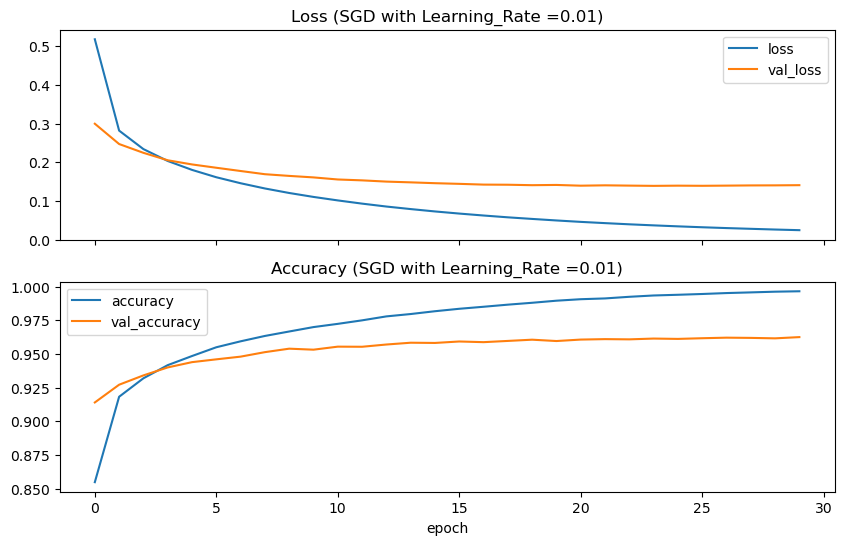

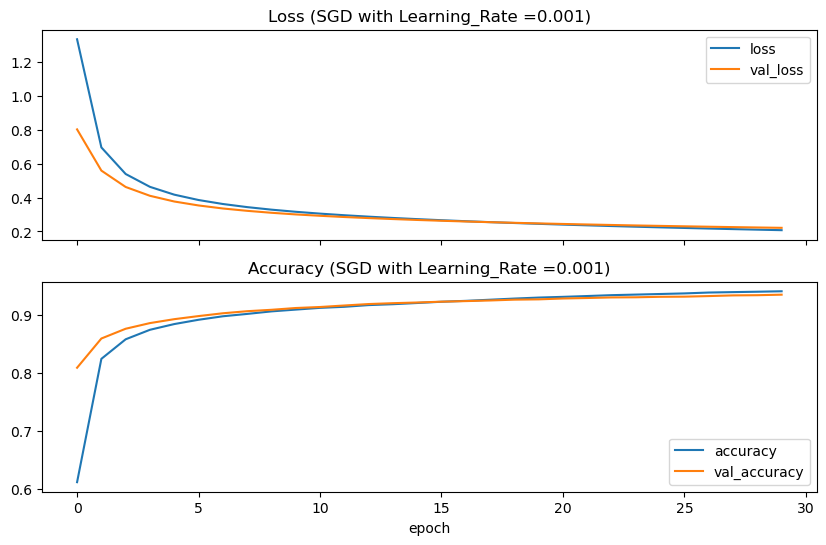

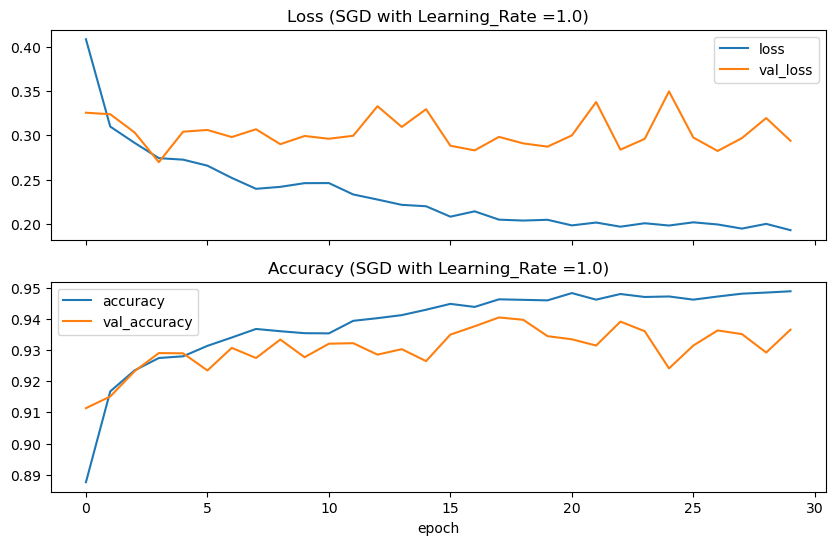

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import Input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt

import datetime

import numpy as np

import pandas as pd

digits = mnist.load_data()
(X_train, y_train), (X_test, y_test) = digits

X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

input_dim = X_train.shape[1]
print(input_dim)
hidden_dim = 100
output_dim = Y_train.shape[1]

# Tensorboard config
%reload_ext tensorboard
!rm -rf tensorboard_logs
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = f"tensorboard_logs/{timestamp}"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Modularise model creation
def build_model(optimizer):
    model = Sequential([Input(shape=(input_dim,)), Dense(100, activation="tanh"), Dense(100, activation="tanh"), Dense(10, activation="softmax")])  
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Modularise training
def train_and_plot(optimizer, vs, title):
    # print(hidden_layer)
    model = build_model(optimizer)
    history = model.fit(X_train, Y_train, validation_split=vs, epochs=30, batch_size=32, verbose=0, callbacks=[tensorboard_callback])
    history_df = pd.DataFrame(history.history)
    history_df["epoch"] = history.epoch
    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6))
    history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0, title=f"Loss ({title})")
    history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1, title=f"Accuracy ({title})")
    plt.show()

# Run training
for learninig_rate in [0.01, 0.001, 1.0]:
        train_and_plot(optimizers.SGD(learning_rate=learninig_rate), 0.2, f"SGD with Learning_Rate ={learninig_rate}")

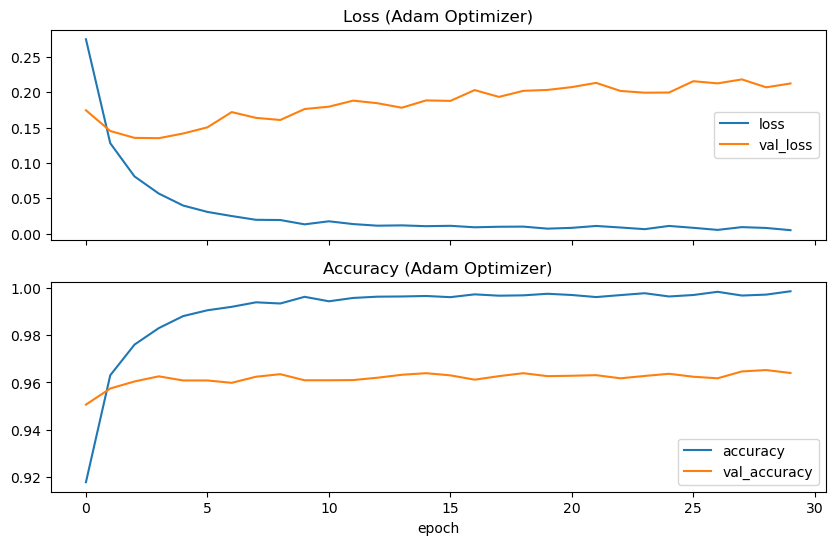

In [3]:
# Plot Adam optimizer to contrast it with SGD
train_and_plot(optimizers.Adam(), 0.2, "Adam Optimizer")

In [4]:
# Create tensorboard with histogram and epoch_accuracy
%tensorboard --logdir tensorboard_logs --port=6007

Reusing TensorBoard on port 6007 (pid 44349), started 3:48:48 ago. (Use '!kill 44349' to kill it.)